# RNN Example (Stock Data)

![stock_data.png](stock_data.png)

```stock_daily.csv``` contains time series data as above.
* 5 columns: Open, High, Low, Volume, Close
* Time descending order

Assumed that Close price get affected from preceeded 7 day's 5 prices(Open, High, Low, Volume, Close)

Predict today's close price using preceeded 7 day's 5 prices(Open, High, Low, Volume, Close)
* input_dimension: 5
* sequence_length: 7
* many to one model

![stock_data2.png](stock_data2.png)

Note that those data above are quantitative which is required to be normalized in order to be used in neural network.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

# Stock data is quantitative (Normalize required for neural network)
def MinMaxScaler(data):
    numerator = data - np.min(data, axis = 0)
    denominator = np.max(data, 0) - np.min(data, axis = 0)
    # noise term prevents zerodivisionerror
    return numerator / (denominator + 1e-7)

# load data from csv
xy = np.loadtxt('stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order

xy[0]

2021-07-22 14:00:40.427872: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-22 14:00:40.427902: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


array([  568.00257 ,   568.00257 ,   552.922516, 13100.      ,
         558.462551])

In [2]:
minVec = np.min(xy, axis = 0) # memorize for scale restore
maxVec = np.max(xy, axis = 0) # memorize for scale restore
minVec, maxVec

(array([ 494.652237,  495.97823 ,  487.562205, 7900.      ,  492.552239]),
 array([8.37809998e+02, 8.41950012e+02, 8.28349976e+02, 1.11649000e+07,
        8.35669983e+02]))

In [4]:
xy_scaled = MinMaxScaler(xy)
x = xy_scaled           # All 5 prices as input sequence
y = xy_scaled[:, [-1]]  # 'Close Price' as label
seq_length = 7   # input sequence

x[0:7], y[7]

(array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
         1.92092403e-01],
        [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
         1.96551555e-01],
        [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
         1.87749731e-01],
        [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
         2.17448151e-01],
        [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
         2.16981885e-01],
        [2.19142110e-01, 2.63907214e-01, 2.24686396e-01, 4.56323384e-01,
         2.24967473e-01],
        [2.33129931e-01, 2.36419163e-01, 1.62682724e-01, 5.70171193e-01,
         1.47442742e-01]]),
 array([0.13289962]))

In [5]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length] # preceeding 7 days
    _y = y[i + seq_length]   # following 1 day's close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142110e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967473e-01]
 [2.33129931e-01 2.3641

 [0.2632911  0.26408058 0.28299261 0.08700367 0.27486309]] -> [0.26795577]
[[0.20360994 0.20210996 0.21514948 0.13750112 0.20453714]
 [0.21174031 0.22841277 0.22944004 0.12828717 0.23965633]
 [0.23758856 0.23679508 0.2444935  0.08761316 0.23927746]
 [0.24248434 0.24107274 0.24343713 0.1354486  0.23586768]
 [0.23738453 0.25590064 0.25951751 0.11438559 0.2611651 ]
 [0.2632911  0.26408058 0.28299261 0.08700367 0.27486309]
 [0.26585563 0.26223072 0.27879643 0.09221117 0.26795577]] -> [0.26469172]
[[0.21174031 0.22841277 0.22944004 0.12828717 0.23965633]
 [0.23758856 0.23679508 0.2444935  0.08761316 0.23927746]
 [0.24248434 0.24107274 0.24343713 0.1354486  0.23586768]
 [0.23738453 0.25590064 0.25951751 0.11438559 0.2611651 ]
 [0.2632911  0.26408058 0.28299261 0.08700367 0.27486309]
 [0.26585563 0.26223072 0.27879643 0.09221117 0.26795577]
 [0.25985247 0.25587181 0.27460024 0.08128529 0.26469172]] -> [0.26233095]
[[0.23758856 0.23679508 0.2444935  0.08761316 0.23927746]
 [0.24248434 0.241072

 [0.10886472 0.11226863 0.12115391 0.17885632 0.11584288]] -> [0.13059]
[[0.12739842 0.13296388 0.14037422 0.08043381 0.12575209]
 [0.10766983 0.10761211 0.11061959 0.14576499 0.10634174]
 [0.10463922 0.11082924 0.12058186 0.11153536 0.10803217]
 [0.11399358 0.12435052 0.13160029 0.12512324 0.13362114]
 [0.12975885 0.12514245 0.12564359 0.17597921 0.12036025]
 [0.10886472 0.11226863 0.12115391 0.17885632 0.11584288]
 [0.11460543 0.12914852 0.13344896 0.17558483 0.13059   ]] -> [0.1361567]
[[0.10766983 0.10761211 0.11061959 0.14576499 0.10634174]
 [0.10463922 0.11082924 0.12058186 0.11153536 0.10803217]
 [0.11399358 0.12435052 0.13160029 0.12512324 0.13362114]
 [0.12975885 0.12514245 0.12564359 0.17597921 0.12036025]
 [0.10886472 0.11226863 0.12115391 0.17885632 0.11584288]
 [0.11460543 0.12914852 0.13344896 0.17558483 0.13059   ]
 [0.1277481  0.13568087 0.13324944 0.12753428 0.1361567 ]] -> [0.1455995]
[[0.10463922 0.11082924 0.12058186 0.11153536 0.10803217]
 [0.11399358 0.12435052 0.

 [0.69299842 0.70821316 0.71207888 0.12176212 0.70776807]] -> [0.69561468]
[[0.66251675 0.68537886 0.68763565 0.15226315 0.68652161]
 [0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]
 [0.69020081 0.6920557  0.70263027 0.13477637 0.70298833]
 [0.6864125  0.69003255 0.68038764 0.18480774 0.67713716]
 [0.66951068 0.67812408 0.67765869 0.14341669 0.68713371]
 [0.69299842 0.70821316 0.71207888 0.12176212 0.70776807]
 [0.68874375 0.69896382 0.70742801 0.16395985 0.69561468]] -> [0.6541421]
[[0.68428507 0.70381968 0.70984873 0.16614681 0.69567303]
 [0.69020081 0.6920557  0.70263027 0.13477637 0.70298833]
 [0.6864125  0.69003255 0.68038764 0.18480774 0.67713716]
 [0.66951068 0.67812408 0.67765869 0.14341669 0.68713371]
 [0.69299842 0.70821316 0.71207888 0.12176212 0.70776807]
 [0.68874375 0.69896382 0.70742801 0.16395985 0.69561468]
 [0.68341088 0.6797427  0.67246478 0.18531863 0.6541421 ]] -> [0.688999]
[[0.69020081 0.6920557  0.70263027 0.13477637 0.70298833]
 [0.6864125  0.69003255 

 [0.77211644 0.78532926 0.79682372 0.0967554  0.78672046]] -> [0.81373749]
[[0.83153522 0.82882988 0.84697231 0.0793941  0.83877253]
 [0.8274264  0.82195069 0.83928426 0.1131487  0.82411293]
 [0.80268544 0.80141439 0.79843759 0.16828897 0.77847252]
 [0.75906128 0.79287318 0.7818291  0.11679663 0.80575192]
 [0.78630815 0.7811092  0.78711094 0.12432554 0.77856004]
 [0.77211644 0.78532926 0.79682372 0.0967554  0.78672046]
 [0.78167481 0.80301855 0.79931805 0.11626781 0.81373749]] -> [0.80534385]
[[0.8274264  0.82195069 0.83928426 0.1131487  0.82411293]
 [0.80268544 0.80141439 0.79843759 0.16828897 0.77847252]
 [0.75906128 0.79287318 0.7818291  0.11679663 0.80575192]
 [0.78630815 0.7811092  0.78711094 0.12432554 0.77856004]
 [0.77211644 0.78532926 0.79682372 0.0967554  0.78672046]
 [0.78167481 0.80301855 0.79931805 0.11626781 0.81373749]
 [0.80166557 0.79131243 0.81310948 0.18297033 0.80534385]] -> [0.79607592]
[[0.80268544 0.80141439 0.79843759 0.16828897 0.77847252]
 [0.75906128 0.792873

In [6]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

print(trainX.shape, trainY.shape)

(507, 7, 5) (507, 1)


In [7]:
model = Sequential()
model.add(layers.LSTM(16, input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu', return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1408      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


2021-07-22 14:02:54.373025: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-22 14:02:54.373069: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-22 14:02:54.373103: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fennecfox38-13UD580-GX30K): /proc/driver/nvidia/version does not exist
2021-07-22 14:02:54.373431: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16, verbose = 2)

2021-07-22 14:03:04.311552: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-22 14:03:04.329174: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz


Epoch 1/100
32/32 - 2s - loss: 0.0558
Epoch 2/100
32/32 - 0s - loss: 0.0069
Epoch 3/100
32/32 - 0s - loss: 0.0042
Epoch 4/100
32/32 - 0s - loss: 0.0032
Epoch 5/100
32/32 - 0s - loss: 0.0030
Epoch 6/100
32/32 - 0s - loss: 0.0027
Epoch 7/100
32/32 - 0s - loss: 0.0026
Epoch 8/100
32/32 - 0s - loss: 0.0025
Epoch 9/100
32/32 - 0s - loss: 0.0024
Epoch 10/100
32/32 - 0s - loss: 0.0023
Epoch 11/100
32/32 - 0s - loss: 0.0023
Epoch 12/100
32/32 - 0s - loss: 0.0022
Epoch 13/100
32/32 - 0s - loss: 0.0021
Epoch 14/100
32/32 - 0s - loss: 0.0020
Epoch 15/100
32/32 - 0s - loss: 0.0020
Epoch 16/100
32/32 - 0s - loss: 0.0019
Epoch 17/100
32/32 - 0s - loss: 0.0019
Epoch 18/100
32/32 - 0s - loss: 0.0018
Epoch 19/100
32/32 - 0s - loss: 0.0018
Epoch 20/100
32/32 - 0s - loss: 0.0017
Epoch 21/100
32/32 - 0s - loss: 0.0017
Epoch 22/100
32/32 - 0s - loss: 0.0017
Epoch 23/100
32/32 - 0s - loss: 0.0017
Epoch 24/100
32/32 - 0s - loss: 0.0016
Epoch 25/100
32/32 - 0s - loss: 0.0016
Epoch 26/100
32/32 - 0s - loss: 0.

In [9]:
pred = model.predict(testX)
pred # one step ahead forecast

array([[0.71826065],
       [0.71676886],
       [0.7531413 ],
       [0.7618047 ],
       [0.7704294 ],
       [0.78635836],
       [0.76736116],
       [0.75112355],
       [0.76693964],
       [0.6434063 ],
       [0.6436761 ],
       [0.6417211 ],
       [0.6038158 ],
       [0.5947429 ],
       [0.5782022 ],
       [0.59493303],
       [0.5889896 ],
       [0.5880137 ],
       [0.60472167],
       [0.62188834],
       [0.6444378 ],
       [0.664171  ],
       [0.65502685],
       [0.6413066 ],
       [0.6395418 ],
       [0.6424903 ],
       [0.6371517 ],
       [0.61866355],
       [0.6076032 ],
       [0.62804085],
       [0.6237396 ],
       [0.6499257 ],
       [0.67450964],
       [0.67296547],
       [0.69037735],
       [0.70659876],
       [0.6986637 ],
       [0.68690026],
       [0.67332363],
       [0.6595371 ],
       [0.6590618 ],
       [0.6829601 ],
       [0.68089175],
       [0.6638218 ],
       [0.6629703 ],
       [0.6573403 ],
       [0.6640193 ],
       [0.634

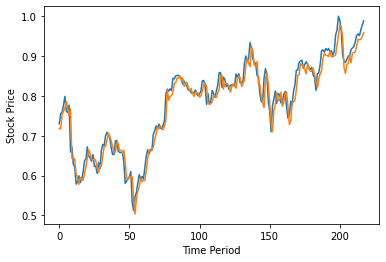

In [10]:
# Plot predictions
plt.plot(testY)
plt.plot(pred)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

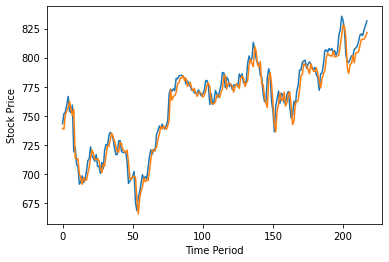

In [11]:
# Scale Restoration: reversed process of minmax scaler (using minVec,maxVec)
testY_origin = minVec[-1] + testY * (maxVec[-1] - minVec[-1])
pred_origin = minVec[-1] + pred * (maxVec[-1] - minVec[-1])

plt.plot(testY_origin)
plt.plot(pred_origin)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()